## Data cleanup for terrorism and countries data

In [ ]:
## import dependencies
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

<class 'geopandas.geodataframe.GeoDataFrame'>


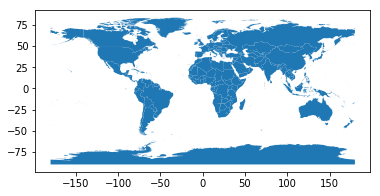

In [44]:
## read in countries.geojson into df
countries_geojsonpath = "datasets/countries.geojson"

countries_gdf = gpd.read_file(countries_geojsonpath)

print(type(countries_gdf))
countries_gdf.head()
countries_gdf.plot()
plt.show()

In [45]:
## read in gterrorism data csv, change encoding to read strings encoded in latin-1
terrorism_csv = "datasets/gtdb_0617_proj_cols.csv"

terrorism_df = pd.read_csv(terrorism_csv, encoding='latin-1')
terrorism_df.head()
## terrorism_df.dtypes


,eventid,iyear,imonth,iday,Date,country,country_txt,latitude,longitude,attacktype1,attacktype1_txt,targtype1,targtype1_txt,gname,weaptype1,weaptype1_txt,nkill,nwound,property
0,197000000001,1970,7,2,7/2/1970,58,Dominican Republic,18.456792,-69.951164,1,Assassination,14,Private Citizens & Property,MANO-D,13,Unknown,1.0,0.0,0
1,197000000002,1970,0,0,NaN,130,Mexico,19.432608,-99.133207,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,13,Unknown,0.0,0.0,0
2,197001000001,1970,1,0,NaN,160,Philippines,15.478598,120.599741,1,Assassination,10,Journalists & Media,Unknown,13,Unknown,1.0,0.0,0
3,197001000002,1970,1,0,NaN,78,Greece,37.983773,23.728157,3,Bombing/Explosion,7,Government (Diplomatic),Unknown,6,Explosives/Bombs/Dynamite,NaN,NaN,1
4,197001000003,1970,1,0,NaN,101,Japan,33.580412,130.396361,7,Facility/Infrastructure Attack,7,Government (Diplomatic),Unknown,8,Incendiary,NaN,NaN,1


In [46]:
## replace nans and check data documentation for -99 as unknown


In [47]:
## summarize df to get relevant terrorism data by country
terrorism_country_df = terrorism_df.groupby(['country_txt'])[['nkill', 'nwound', 'property']].sum()
terrorism_country_df.head()


,nkill,nwound,property
country_txt,,,
Afghanistan,33146.0,38228.0,-11498
Albania,42.0,126.0,48
Algeria,11091.0,9064.0,-2322
Andorra,NaN,NaN,1
Angola,3036.0,2044.0,236


In [48]:
## merge relevant terrorism data into countries df


In [49]:
## send to geojson and save in datasets folder
